# Задание 1



```
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.
```



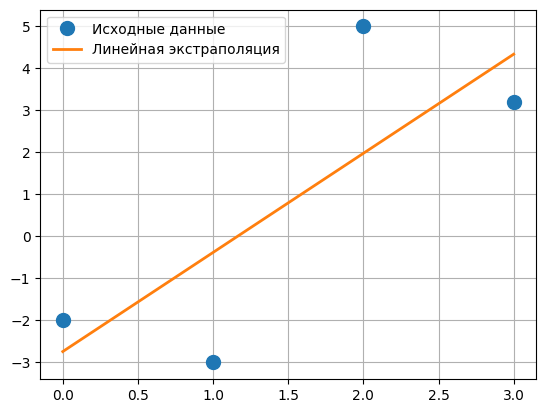

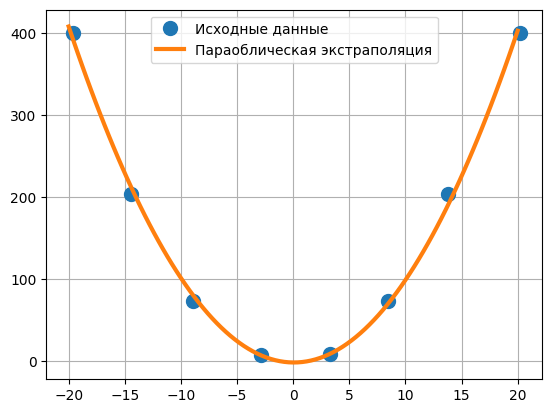

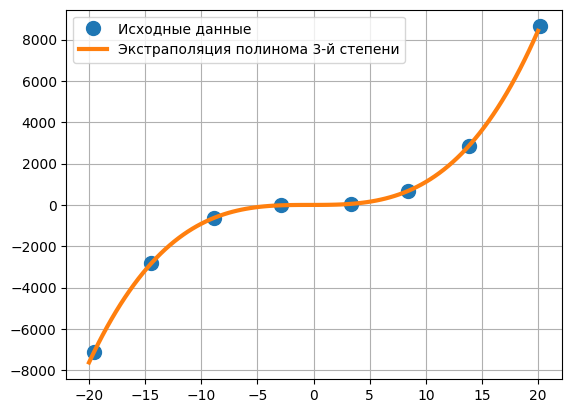

In [ ]:
from numpy.random import *
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

# Линейная ээкстраполяция
x = np.array([0, 1, 2, 3])
y = np.array([-2, -3, 5, 3.2])

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, '-', label='Линейная экстраполяция', lw=2)
plt.grid()
plt.legend()
plt.show()

# Экстраполяция полинома второй степени
delta = 1.0
n = 8
x = linspace(-20, 20, n)
y = x**2 + delta*(rand(n) - 0.5)
x += delta*(rand(n) - 0.5)

m = vstack((x**2, x, ones(n))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-20, 20, 101)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=3, label="Параоблическая экстраполяция")
plt.grid()
plt.legend()
plt.show()


# Экстраполяция полниома третьей степени
m = vstack((x**3, x**2, x, ones(n))).T
y = x**3 + x**2 + x + delta*(rand(n) - 0.5)
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-20, 20, 101)
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3, label="Экстраполяция полинома 3-й степени")
plt.grid()
plt.legend()
plt.show()


# Задание 2

```
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.
```



[  99.50249355 -100.49750645]
Линейное отклонение: -7.783686629729763e+18
Квадратичное отклонение: 0.14773222611084458


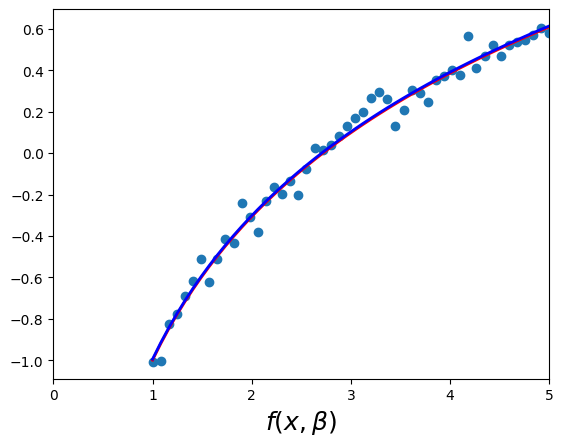

In [ ]:
from scipy.optimize import curve_fit
beta = (4, -5)
def f(x, b0, b1):
  return b0 + b1 + np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print("Линейное отклонение:", lin_dev)
redisuals = ydata - f(xdata, *beta_opt)
fres = sum(redisuals**2)
print("Квадратичное отклонение:", fres)


fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


# Задание 3

```
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.
```



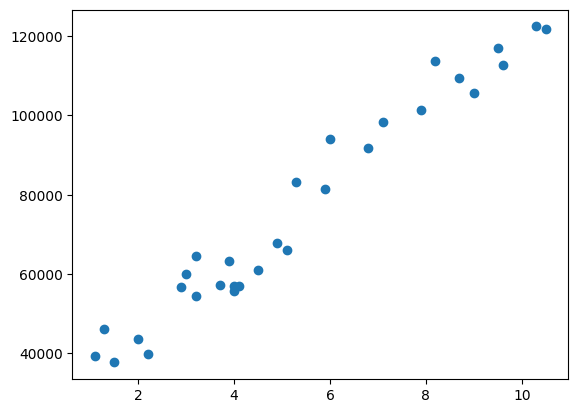

     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


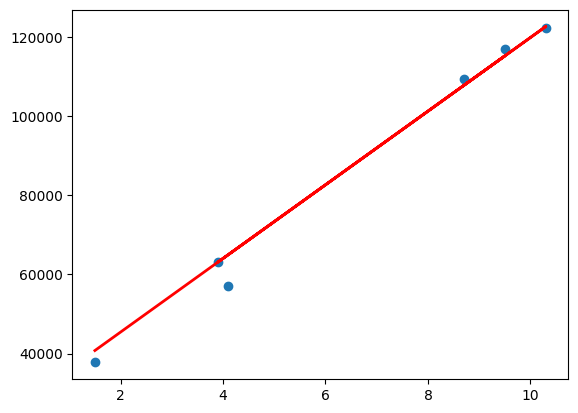

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)
dataset = pd.DataFrame(dataframe)
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.show()

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

# Задание 4

```
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df2 = pd.read_csv(url)

df2 = df2.rename(columns = {'fixed acidity':'x1', 'volatile acidity': 'x2', 'citric acid':'x3', 'quality':'y'}, inplace = False)

frames = [df2]
dataset = pd.concat([df2], axis = 1, join = "inner")
dataset.head()

print(dataset.shape)
print(dataset.describe())

X = dataset[['x1','x2','x3']]
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
display(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

(1599, 12)
                x1           x2           x3  residual sugar    chlorides  \
count  1599.000000  1599.000000  1599.000000     1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976        2.538806     0.087467   
std       1.741096     0.179060     0.194801        1.409928     0.047065   
min       4.600000     0.120000     0.000000        0.900000     0.012000   
25%       7.100000     0.390000     0.090000        1.900000     0.070000   
50%       7.900000     0.520000     0.260000        2.200000     0.079000   
75%       9.200000     0.640000     0.420000        2.600000     0.090000   
max      15.900000     1.580000     1.000000       15.500000     0.611000   

       free sulfur dioxide  total sulfur dioxide      density           pH  \
count          1599.000000           1599.000000  1599.000000  1599.000000   
mean             15.874922             46.467792     0.996747     3.311113   
std              10.460157             32.895324     0.001887

,Coefficient
x1,0.011781
x2,-1.738704
x3,0.015361


,Actual,Predicted
1109,6,5.782357
1032,5,5.135397
1002,7,6.073760
487,6,5.469940
979,5,5.834545
...,...,...
794,6,6.123541
813,4,5.872590
1322,5,5.988208
704,4,5.243421


Mean Squared Error:  0.4998866143956839


# Задание 5



```
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.
```



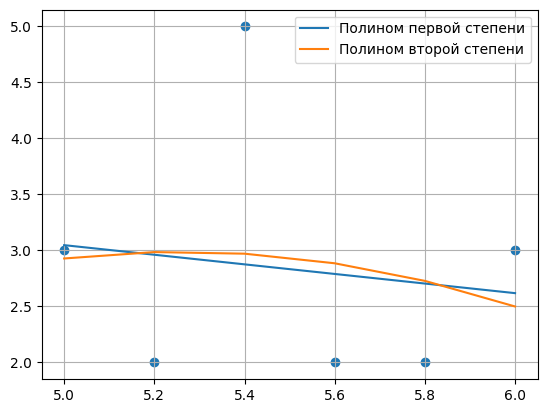

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.array([5, 5.2, 5.4, 5.6, 5.8, 6])
y0 = np.array([3, 2, 5, 2, 2, 3])

x = np.vstack([x0, np.ones(len(x0))]).T
sp = np.linalg.lstsq(x, y0, rcond=None)[0]
y1 = sp[0] * x0 + sp[1]


x = np.vstack([x0**2, x0, np.ones(len(x))]).T
sp = np.linalg.lstsq(x, y0, rcond=None)[0]
y2 = sp[0] * x0**2 + sp[1] * x0 + sp[2]

plt.scatter(x0, y0)
plt.plot(x0, y1, label="Полином первой степени")
plt.plot(x0, y2, label="Полином второй степени")
plt.legend()
plt.grid()
plt.show()


